## GANS

The importance of using GANs for artwork lies in their potential to revolutionize the field of art
creation. GANs offer a novel approach to generate original and visually appealing artworks, pushing
the boundaries of traditional art techniques and opening up new possibilities for artistic expression.
The topic of using GANs for artwork generation is currently an active area of research, with ongoing
advancements and innovations. Researchers are constantly exploring different techniques and
methodologies to improve the quality, diversity, and interpretability of GAN-generated artworks.
This includes developing new GAN architectures, optimizing training algorithms, and exploring
different applications, such as style transfer, art restoration, and art synthesis.

GAN have emerged as a cutting-edge technique in the realm of artificial intelligence and art, offering a thrilling and ever-evolving avenue for artwork generation. GANs are a class of machine learning models composed of a generator and a discriminator, which engage in a competitive process to produce visually captivating and authentic images. This dynamic interplay between the generator and discriminator results in the generation of realistic and highquality
artwork, making GANs a captivating field of exploration for artists, designers, and AI
enthusiasts alike.

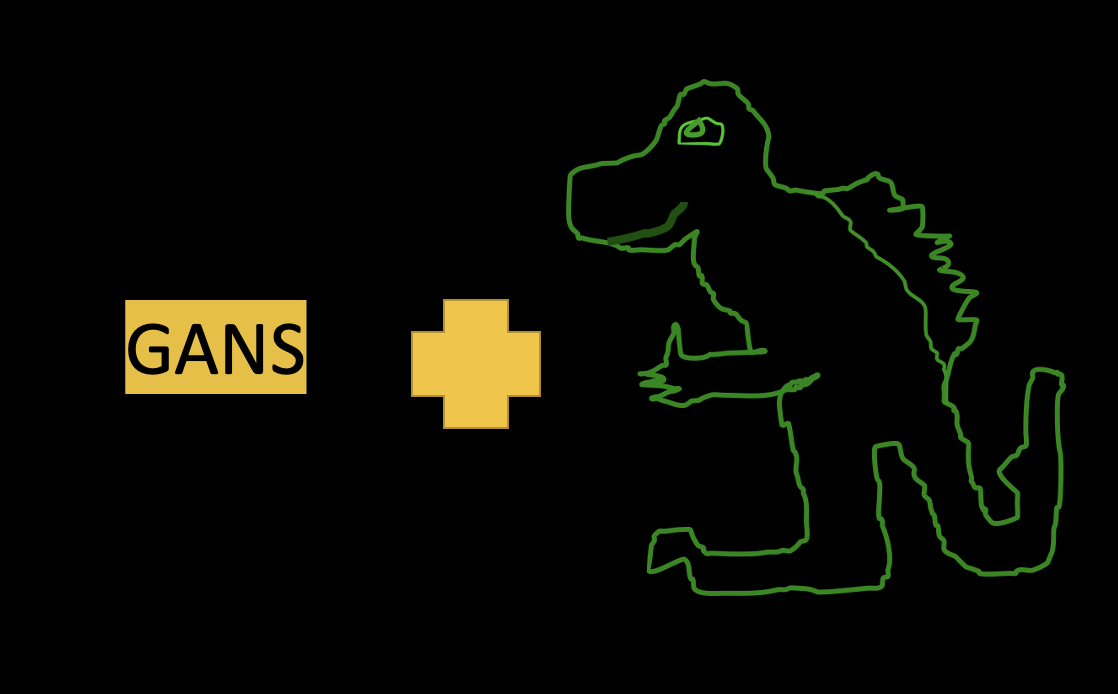


In [7]:
import numpy as np
import pandas as pd
import os

PIC_DIR = f'/home/ra168855/Documents/Learning/data/img_align_celeba/img_align_celeba/'
    
from tqdm import tqdm
from PIL import Image

IMAGES_COUNT = 17

ORIG_WIDTH = 178
ORIG_HEIGHT = 208
diff = (ORIG_HEIGHT - ORIG_WIDTH) // 2

WIDTH = 128
HEIGHT = 128

crop_rect = (0, diff, ORIG_WIDTH, ORIG_HEIGHT - diff)

images = []
for pic_file in tqdm(os.listdir(PIC_DIR)[:IMAGES_COUNT]):
    pic = Image.open(PIC_DIR + pic_file).crop(crop_rect)
    pic.thumbnail((WIDTH, HEIGHT), Image.ANTIALIAS)
    images.append(np.uint8(pic))

100%|██████████| 17/17 [00:00<00:00, 944.35it/s]


GANs have been widely used for generating images and coupled with the Tagasaurus tool (shown in
3a)[16] which provides user entered tags. The top level view of the structure of the data captured by
the Tagasaurus tagging phase is shown in Figure 3b, with the operations of tagging being considered
as organizing the data into the aspects of ’tags’ (as in hashtags), ’emotions’, and ’memes’ which are
provided by a single user manually. The goal of this toy project is to use the emotions that have
entered such as ’Happy’ and generate images of faces that have a happy emotion. Over the corpus
of images a set of these annotations are produced in which each component can then be compared
with other annotations of the same type such as in the exploration of the variation in emotional
associations with images.
In this research we used all the tagged images that were ’Happy’ to train the GAN. These ’Happy’
images were identified from manual section using Tagasaurus. The GANs were used to create fake
images by generating images that are visually similar to real images, but with modifications or
alterations to include a smile for ’Happy’ and other physical characteristics such as the eye being
opened wider. The GAN was trained to generate fake celebrity images by training the generator
on a dataset of real celebrity images and the discriminator on a dataset of real and fake celebrity
images. The generator can then be used to generate new celebrity images with different poses,
expressions, or attributes, creating realistic-looking fake images.


In [8]:


images = np.array(images) / 255
#images = np.array(images) 
print(images.shape)


from matplotlib import pyplot as plt

(17, 128, 128, 3)


Overall, the results obtained from the GAN showcase its potential to generate realistic and artistic
images that are visually captivating and convey a sense of happiness and positivity. The GANgenerated
images can serve as a valuable tool for creating unique and original artwork, generating
creative content, or exploring the artistic possibilities of GAN-generated images in various applications.

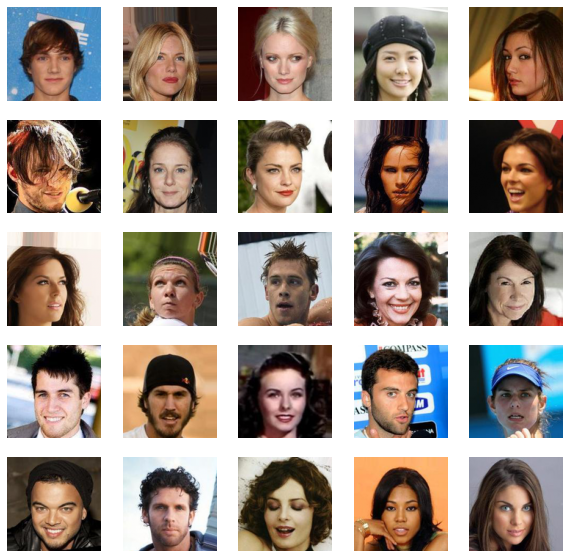

In [3]:
plt.figure(1, figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

In [9]:

from keras import Input
from keras.layers import Dense, Reshape, LeakyReLU, Conv2D, Conv2DTranspose, Flatten, Dropout
from keras.models import Model
from keras.optimizers import RMSprop

LATENT_DIM = 32
CHANNELS = 3

In [10]:

def create_generator():
    gen_input = Input(shape=(LATENT_DIM, ))

    x = Dense(128 * 16 * 16)(gen_input)
    x = LeakyReLU()(x)
    x = Reshape((16, 16, 128))(x)

    x = Conv2D(256, 5, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2D(512, 5, padding='same')(x)
    x = LeakyReLU()(x)
    x = Conv2D(512, 5, padding='same')(x)
    x = LeakyReLU()(x)
    x = Conv2D(CHANNELS, 7, activation='tanh', padding='same')(x)

    generator = Model(gen_input, x)
    return generator

def create_discriminator():
    disc_input = Input(shape=(HEIGHT, WIDTH, CHANNELS))

    x = Conv2D(256, 3)(disc_input)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Flatten()(x)
    x = Dropout(0.4)(x)

    x = Dense(1, activation='sigmoid')(x)
    discriminator = Model(disc_input, x)

    optimizer = RMSprop(
        lr=.0001,
        clipvalue=1.0,
        decay=1e-8
    )

    discriminator.compile(
        optimizer=optimizer,
        loss='binary_crossentropy'
    )

    return discriminator



generator = create_generator()
discriminator = create_discriminator()
discriminator.trainable = False


In [11]:

gan_input = Input(shape=(LATENT_DIM, ))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)

optimizer = RMSprop(lr=.0001, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=optimizer, loss='binary_crossentropy')



50/1500: d_loss: 0.4377,  a_loss: 0.7109.  (17.4 sec)
100/1500: d_loss: 0.3084,  a_loss: 1.2078.  (14.9 sec)
150/1500: d_loss: 0.9870,  a_loss: 1.1806.  (15.5 sec)
200/1500: d_loss: 0.4272,  a_loss: 1.2444.  (15.1 sec)
250/1500: d_loss: 0.5042,  a_loss: 0.5493.  (15.3 sec)
300/1500: d_loss: 0.3837,  a_loss: 1.3698.  (15.0 sec)
350/1500: d_loss: 0.3715,  a_loss: 2.6971.  (15.1 sec)
400/1500: d_loss: 0.4822,  a_loss: 2.2499.  (15.0 sec)
450/1500: d_loss: 0.3645,  a_loss: 1.1621.  (14.8 sec)
500/1500: d_loss: 0.5610,  a_loss: 1.4040.  (15.5 sec)
550/1500: d_loss: 0.2570,  a_loss: 3.1104.  (15.5 sec)
600/1500: d_loss: 0.2775,  a_loss: 2.3140.  (15.3 sec)
650/1500: d_loss: 0.1708,  a_loss: 3.3878.  (15.2 sec)
700/1500: d_loss: 0.1130,  a_loss: 3.1357.  (15.5 sec)
750/1500: d_loss: 0.1464,  a_loss: 4.4395.  (15.1 sec)
800/1500: d_loss: 0.0839,  a_loss: 3.7823.  (15.4 sec)
850/1500: d_loss: 0.1264,  a_loss: 4.9949.  (15.2 sec)
900/1500: d_loss: 0.0901,  a_loss: 3.6004.  (15.3 sec)
950/1500: d

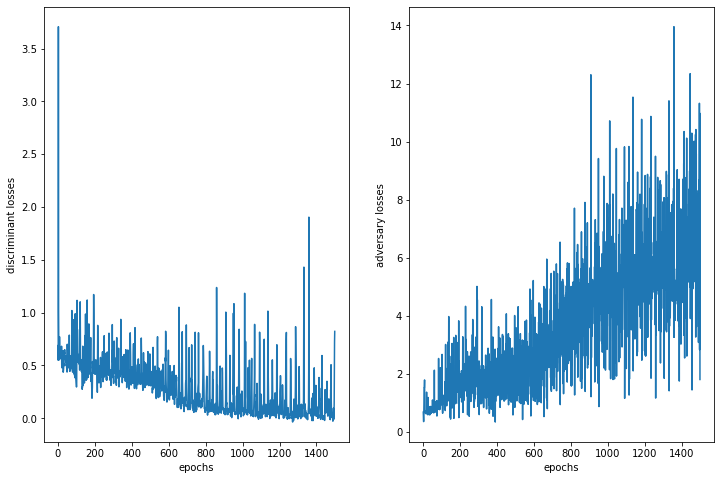

In [12]:

import time
iters = 1500
batch_size = 16

RES_DIR = 'res2'
FILE_PATH = '%s/generated_%d.png'
if not os.path.isdir(RES_DIR):
    os.mkdir(RES_DIR)

CONTROL_SIZE_SQRT = 6
control_vectors = np.random.normal(size=(CONTROL_SIZE_SQRT**2, LATENT_DIM)) / 2

start = 0
d_losses = []
a_losses = []
images_saved = 0
for step in range(iters):
    start_time = time.time()
    latent_vectors = np.random.normal(size=(batch_size, LATENT_DIM))
    generated = generator.predict(latent_vectors)

    real = images[start:start + batch_size]
    combined_images = np.concatenate([generated, real])

    labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
    labels += .05 * np.random.random(labels.shape)

    d_loss = discriminator.train_on_batch(combined_images, labels)
    d_losses.append(d_loss)

    latent_vectors = np.random.normal(size=(batch_size, LATENT_DIM))
    misleading_targets = np.zeros((batch_size, 1))

    a_loss = gan.train_on_batch(latent_vectors, misleading_targets)
    a_losses.append(a_loss)

    start += batch_size
    if start > images.shape[0] - batch_size:
        start = 0

    if step % 50 == 49:
        gan.save_weights('./drive/My Drive/gan.h5')

        print('%d/%d: d_loss: %.4f,  a_loss: %.4f.  (%.1f sec)' % (step + 1, iters, d_loss, a_loss, time.time() - start_time))

        control_image = np.zeros((WIDTH * CONTROL_SIZE_SQRT, HEIGHT * CONTROL_SIZE_SQRT, CHANNELS))
        control_generated = generator.predict(control_vectors)
        for i in range(CONTROL_SIZE_SQRT ** 2):
            x_off = i % CONTROL_SIZE_SQRT
            y_off = i // CONTROL_SIZE_SQRT
            control_image[x_off * WIDTH:(x_off + 1) * WIDTH, y_off * HEIGHT:(y_off + 1) * HEIGHT, :] = control_generated[i, :, :, :]
        im = Image.fromarray(np.uint8(control_image * 255))
        im.save(FILE_PATH % (RES_DIR, images_saved))
        images_saved += 1


plt.figure(1, figsize=(12, 8))
plt.subplot(121)
plt.plot(d_losses)
plt.xlabel('epochs')
plt.ylabel('discriminant losses')
plt.subplot(122)
plt.plot(a_losses)
plt.xlabel('epochs')
plt.ylabel('adversary losses')
plt.show()

import imageio
import shutil

images_to_gif = []
for filename in os.listdir(RES_DIR):
    images_to_gif.append(imageio.imread(RES_DIR + '/' + filename))
imageio.mimsave('drive/My Drive/visual.gif', images_to_gif)
shutil.rmtree(RES_DIR)
